In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from prettytable import PrettyTable

In [9]:
def plot_loss(vae_loss, iwae_loss, output_file, title, save_fig=True, ylim=[80,180]):
    plt.plot(range(1,len(vae_loss)+1), vae_loss, label=f"VAE (min: {min(vae_loss):.2f})")
    plt.plot(range(1,len(iwae_loss)+1), iwae_loss, label=f"IWAE (min: {min(iwae_loss):.2f})")
    plt.title(title)
    plt.legend()
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.ylim(ylim)
    plt.grid()
    if save_fig:
        plt.savefig(output_file)
    plt.show()

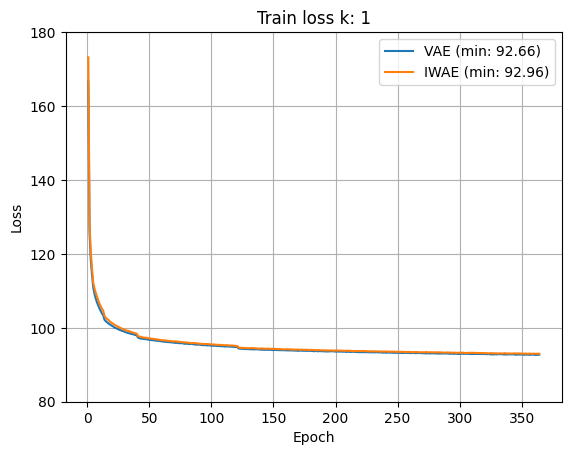

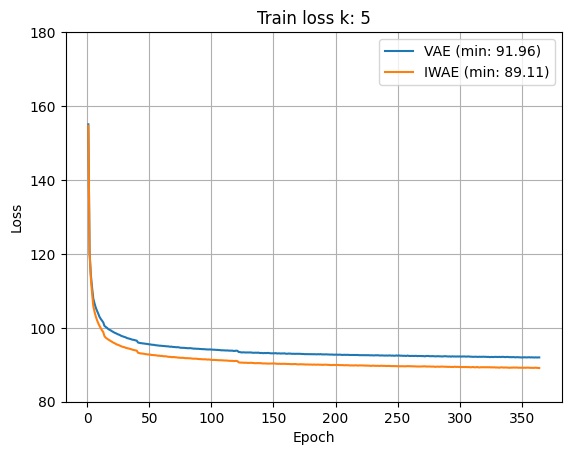

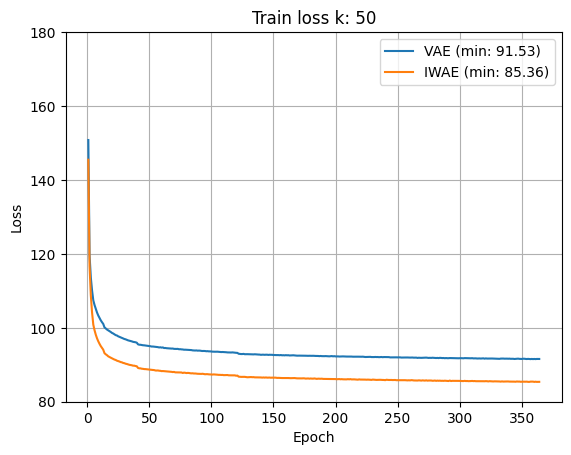

In [5]:
for k in [1,5,50]:
    vae_file = f"outputs/L1/k{k}_vae_train_loss.pt"
    iwae_file = f"outputs/L1/k{k}_iwae_train_loss.pt"
    title = f"Train loss k: {k}"
    output_file = f"plots/L1/k{k}_loss.png"

    vae_loss = torch.load(vae_file).numpy()
    iwae_loss = torch.load(iwae_file).numpy()

    plot_loss(vae_loss, iwae_loss, output_file, title, save_fig=False)

In [14]:
table = PrettyTable(["k", "VAE", "IWAE"])
for k in [1,5,50]:
    vae_file = f"outputs/L1/k{k}_vae_eval_nll.pt"
    iwae_file = f"outputs/L1/k{k}_iwae_eval_nll.pt"

    vae_eval = torch.load(vae_file)
    iwae_eval = torch.load(iwae_file)
    table.add_row([k, f"{vae_eval:.2f}", f"{iwae_eval:.2f}"])

print(table)


+----+-------+-------+
| k  |  VAE  |  IWAE |
+----+-------+-------+
| 1  | 89.07 | 89.47 |
| 5  | 88.70 | 87.46 |
| 50 | 88.50 | 86.57 |
+----+-------+-------+


## Omniglot

In [37]:
for k in [1,]:
    vae_file = f"outputs/omniglot/L1/k{k}_vae_train_loss.pt"
    iwae_file = f"outputs/omniglot/L1/k{k}_iwae_train_loss.pt"
    title = f"Train loss k: {k}"
    output_file = f"plots/omniglot/L1/k{k}_loss.png"

    iwae_loss = torch.load(iwae_file).numpy()
    vae_loss = torch.load(vae_file).numpy()

    plot_loss(vae_loss, iwae_loss, output_file, title, save_fig=True, ylim=[100,185])

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/omniglot/L1/k1_vae_train_loss.pt'

In [36]:
table = PrettyTable(["k", "VAE", "IWAE"])
for k in [1,]:
    vae_file = f"outputs/omniglot/L1/k{k}_vae_eval_nll.pt"
    iwae_file = f"outputs/omniglot/L1/k{k}_iwae_eval_nll.pt"

    try:
        vae_eval = torch.load(vae_file)
    except:
        vae_eval = 0
    iwae_eval = torch.load(iwae_file)
    table.add_row([k, f"{vae_eval:.2f}", f"{iwae_eval:.2f}"])

print(table)


+----+--------+--------+
| k  |  VAE   |  IWAE  |
+----+--------+--------+
| 1  | 125.68 | 139.06 |
| 5  | 119.81 | 118.50 |
| 50 | 119.31 | 115.01 |
+----+--------+--------+
